In [70]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras import datasets
import matplotlib.pyplot as plt

#The MNIST dataset contains 60,000 training images and 10,000 testing images of handwritten digits.

#The images are stored in an array of shape (60000, 28, 28) of type uint8 with values in the range [0, 255]. The labels are an array of integers, ranging from 0 to 9. There is a one-to-one correspondence between the images and the labels.

In [71]:
# Load the MNIST dataset. The dataset is already split into train and test sets.
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
# Normalize the images. Because the pixel values are between 0 and 255, we divide by 255 to get the values between 0 and 1.
train_images, test_images = train_images / 255.0, test_images / 255.0

In [72]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [73]:
print("The shape of the train_images is: ", train_images.shape)
print("The shape of the train_labels is: ", train_labels.shape)

The shape of the train_images is:  (60000, 28, 28)
The shape of the train_labels is:  (60000,)


In [74]:
print("The shape of the test_images is: ", test_images.shape)
print("The shape of the test_labels is: ", test_labels.shape)

The shape of the test_images is:  (10000, 28, 28)
The shape of the test_labels is:  (10000,)


In [75]:
print("The label values range from {} to {}".format(train_labels.min(), train_labels.max()))

The label values range from 0 to 9


The pixel values range from: 0.0 to: 1.0


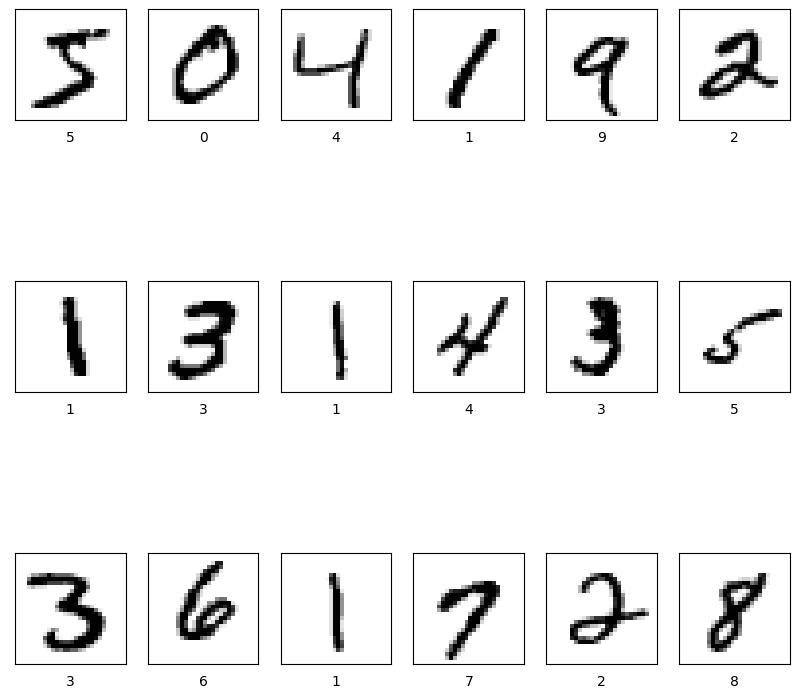

In [76]:
print("The pixel values range from:", np.min(train_images), "to:", np.max(train_images))

# Plot the first 25 images from the training set and display the class name below each image. 5x5 grid.
plt.figure(figsize=(10,10))
for i in range(18):
    plt.subplot(3,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [94]:
# Building the model using LSTM. The input shape is the same as the train_images shape. The output shape is 10 because there are 10 classes. And we use softmax activation function because we have a multi-class classification problem. Also relu activation function is used in the hidden layers. Dropout is used to prevent overfitting.
model = Sequential()
model.add(LSTM(100, input_shape = (28,28), return_sequences=False, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [98]:
#If you only want to use the output of the last timestep, you can set return_sequences = False. This ensures that each LSTM layer only returns the output of the last timestep and therefore gives only one output input to the next layer. This gives the next layer the opportunity to process only the last timestep and therefore setting this parameter to False may result in less memory usage when you use a series of LSTM layers. Yalnızca son zaman adımının çıktısını kullanmak istiyorsanız return_sequences = False olarak ayarlayabilirsiniz. Bu, her LSTM katmanının yalnızca son zaman adımının çıktısını döndürmesini ve dolayısıyla bir sonraki katmana yalnızca bir çıktı girdisi vermesini sağlar. Bu, bir sonraki katmana yalnızca son zaman adımını işleme fırsatı verir ve bu nedenle bu parametrenin False olarak ayarlanması, bir dizi LSTM katmanı kullandığınızda daha az bellek kullanımına neden olabilir.

In [95]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 100)               51600     
                                                                 
 dropout_16 (Dropout)        (None, 100)               0         
                                                                 
 dense_19 (Dense)            (None, 10)                1010      
                                                                 
Total params: 52,610
Trainable params: 52,610
Non-trainable params: 0
_________________________________________________________________


In [99]:
model.compile(optimizer='adam', 
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

In [100]:
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3292 - accuracy: 0.8986 - val_loss: 0.1383 - val_accuracy: 0.9582
Epoch 2/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1477 - accuracy: 0.9562 - val_loss: 0.0894 - val_accuracy: 0.9736
Epoch 3/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1045 - accuracy: 0.9696 - val_loss: 0.1059 - val_accuracy: 0.9676
Epoch 4/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0833 - accuracy: 0.9758 - val_loss: 0.0711 - val_accuracy: 0.9790
Epoch 5/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0698 - accuracy: 0.9794 - val_loss: 0.0826 - val_accuracy: 0.9748


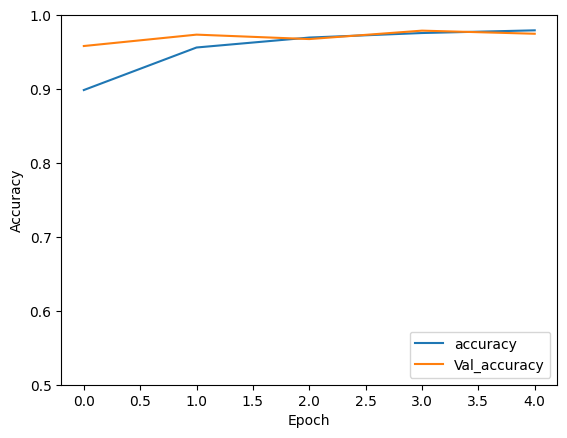

In [101]:
# Plot the training and validation accuracy/loss by epoch
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [102]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("Test accuracy:", round(test_acc*100), "%")

313/313 - 1s - loss: 0.0826 - accuracy: 0.9748 - 1s/epoch - 5ms/step
Test accuracy: 97 %


313/313 [==============================] - 2s 5ms/step


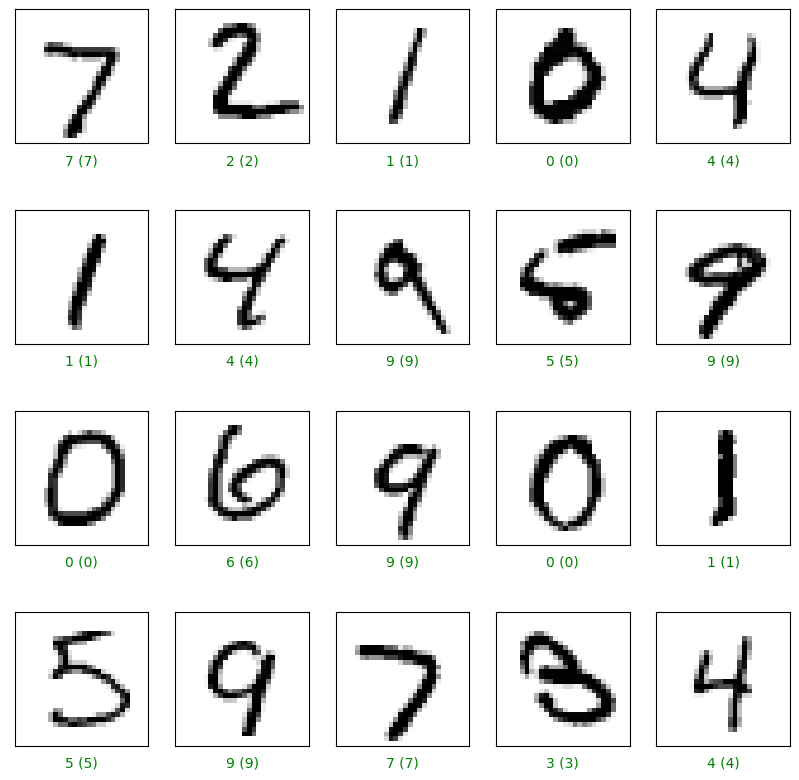

In [109]:
# Using trained model, it is possible to predict the class of the test images. Let's predict 20 images. Correct predictions are in green and incorrect predictions are in red.
predictions = model.predict(test_images)
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], class_names[true_label]), color=color)
plt.show()

In [110]:
img = test_images[227]
print(img.shape)

(28, 28)


In [111]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [112]:
predictions_img = model.predict(img)
max_confidence = np.argmax(predictions_img[0])
print("The predicted class is: ", class_names[max_confidence])
print("The highest confidence is:", max_confidence)

1/1 [==============================] - 0s 18ms/step
The predicted class is:  4
The highest confidence is: 4


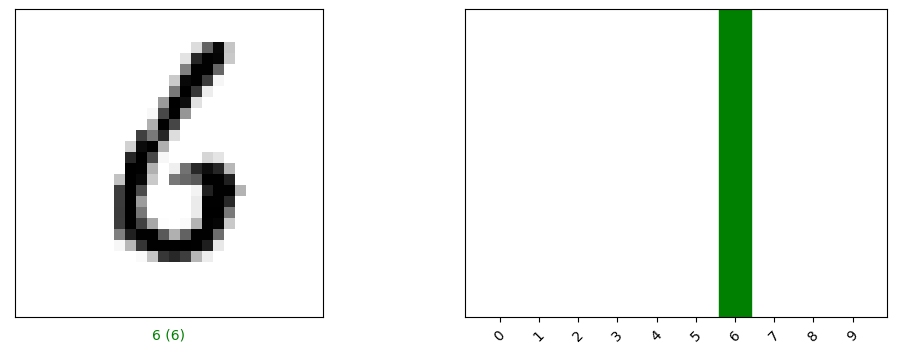

In [113]:
plt.figure(figsize=(12,4))
i = 50
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])  
if np.argmax(predictions[i]) == test_labels[i]:
    color = 'green'
else:
    color = 'red'
plt.imshow(test_images[i], cmap=plt.cm.binary)
plt.xlabel("{} ({})".format(class_names[np.argmax(predictions[i])], class_names[test_labels[i]]), color=color)
plt.subplot(1,2,2)
plt.xticks(range(10), class_names, rotation=45)
plt.yticks([])
thisplot = plt.bar(range(10), predictions[i], color="#777777")
plt.ylim([0, 1])

thisplot[np.argmax(predictions[i])].set_color('red')
thisplot[test_labels[i]].set_color('green')
plt.show()